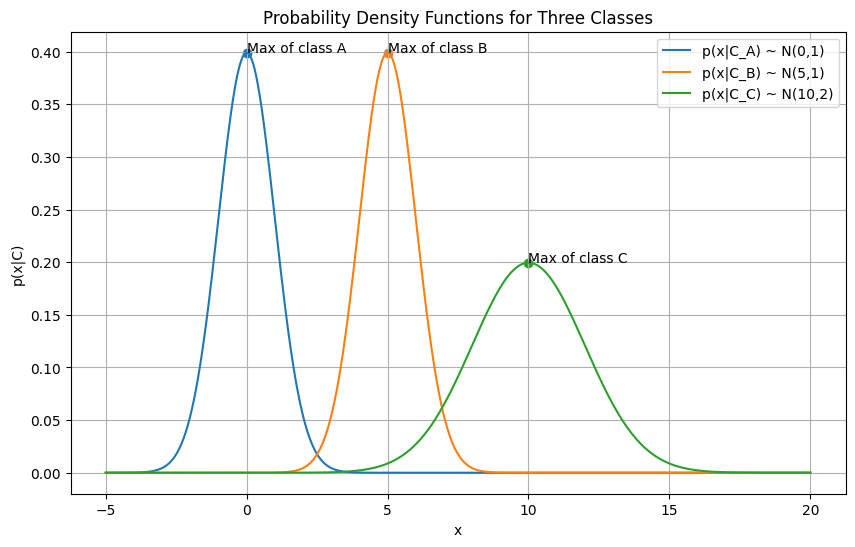

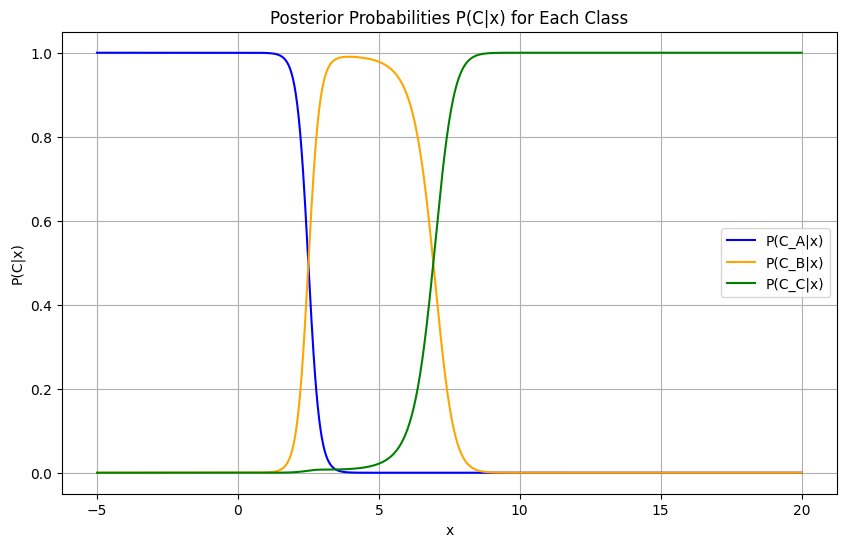

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
#Q1-3
# Define the parameters for the Gaussian distributions of each class
mu_a, sigma_a = 0, 1  # Class C_a ~ N(0,1)
mu_b, sigma_b = 5, 1  # Class C_b ~ N(5,1)
mu_c, sigma_c = 10, 2 # Class C_c ~ N(10,2)

# Generate points on the x-axis
x = np.linspace(-5, 20, 1000)

# Calculate the probability density function (PDF) for each class
pdf_a = norm.pdf(x, mu_a, sigma_a)
pdf_b = norm.pdf(x, mu_b, sigma_b)
pdf_c = norm.pdf(x, mu_c, sigma_c)

max_pdf_a = np.max(pdf_a)
max_pdf_b = np.max(pdf_b)
max_pdf_c = np.max(pdf_c)
x_max_a = x[np.argmax(pdf_a)]
x_max_b = x[np.argmax(pdf_b)]
x_max_c = x[np.argmax(pdf_c)]

# Plot the PDFs for each class
plt.figure(figsize=(10, 6))
plt.plot(x, pdf_a, label='p(x|C_A) ~ N(0,1)')
plt.plot(x, pdf_b, label='p(x|C_B) ~ N(5,1)')
plt.plot(x, pdf_c, label='p(x|C_C) ~ N(10,2)')
plt.scatter(x_max_a,max_pdf_a)
plt.scatter(x_max_b,max_pdf_b)
plt.scatter(x_max_c,max_pdf_c)
plt.annotate(f'Max of class A', xy=(x_max_a, max_pdf_a))
plt.annotate(f'Max of class B', xy=(x_max_b, max_pdf_b))
plt.annotate(f'Max of class C', xy=(x_max_c, max_pdf_c))
plt.title('Probability Density Functions for Three Classes')
plt.xlabel('x')
plt.ylabel('p(x|C)')
plt.legend()
plt.grid(True)
plt.show()



#Plot P(C|x) for each class
total_likelihood = 1/3*pdf_a + 1/3*pdf_b + 1/3*pdf_c

# Calculate the posterior probability for each class
posterior_a = pdf_a*1/3 / total_likelihood
posterior_b = pdf_b*1/3 / total_likelihood
posterior_c = pdf_c*1/3 / total_likelihood

# Plot the posterior probabilities for each class
plt.figure(figsize=(10, 6))
plt.plot(x, posterior_a, label='P(C_A|x)', color='blue')
plt.plot(x, posterior_b, label='P(C_B|x)', color='orange')
plt.plot(x, posterior_c, label='P(C_C|x)', color='green')

plt.title('Posterior Probabilities P(C|x) for Each Class')
plt.xlabel('x')
plt.ylabel('P(C|x)')
plt.legend()
plt.grid(True)
plt.show()


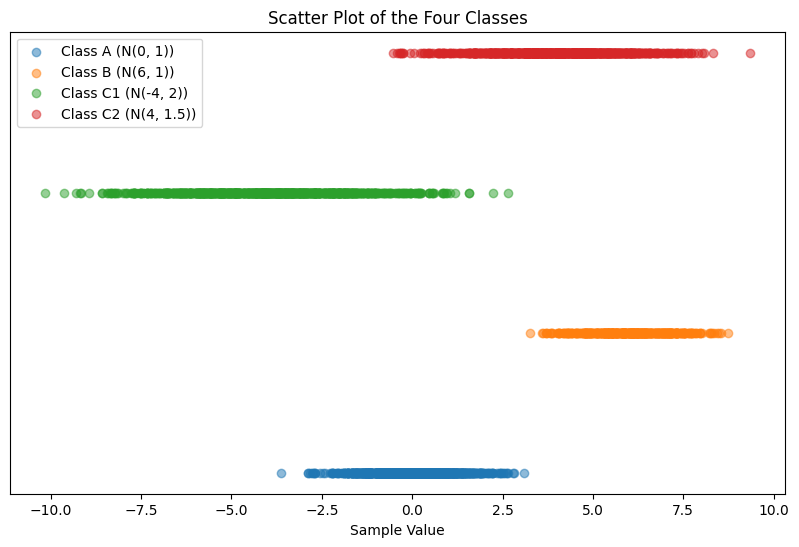

In [2]:
#Q3-1
import numpy as np
import matplotlib.pyplot as plt
classA_samples = np.random.normal(0, 1, 1000)  # Class A: N(0, 1)
classB_samples = np.random.normal(6, 1, 500)   # Class B: N(6, 1)
classC1_samples = np.random.normal(-4, 2, 1000)  # Class C1: N(-4, 2)
classC2_samples = np.random.normal(4, 1.5, 1000)  # Class C2: N(4, 1.5)

# Plot the PDFs for each class
plt.figure(figsize=(10, 6))
plt.scatter(classA_samples, np.zeros_like(classA_samples), label='Class A (N(0, 1))', alpha=0.5)
plt.scatter(classB_samples, np.zeros_like(classB_samples) + 1, label='Class B (N(6, 1))', alpha=0.5)  # Offset for visibility
plt.scatter(classC1_samples, np.zeros_like(classC1_samples) + 2, label='Class C1 (N(-4, 2))', alpha=0.5)  # Offset for visibility
plt.scatter(classC2_samples, np.zeros_like(classC2_samples) + 3, label='Class C2 (N(4, 1.5))', alpha=0.5)  # Offset for visibility

# Add legend and labels

plt.legend()
plt.title('Scatter Plot of the Four Classes')
plt.xlabel('Sample Value')
plt.yticks([])  # Hide y-axis ticks
plt.show()


Sample mean of ClassC1 + ClassC2: 0.051
Sample variance of ClassC1 + ClassC2: 6.471
True mean of ClassC1 + ClassC2: 0
True standard deviation of ClassC1 + ClassC2 assuming independence: 2.5


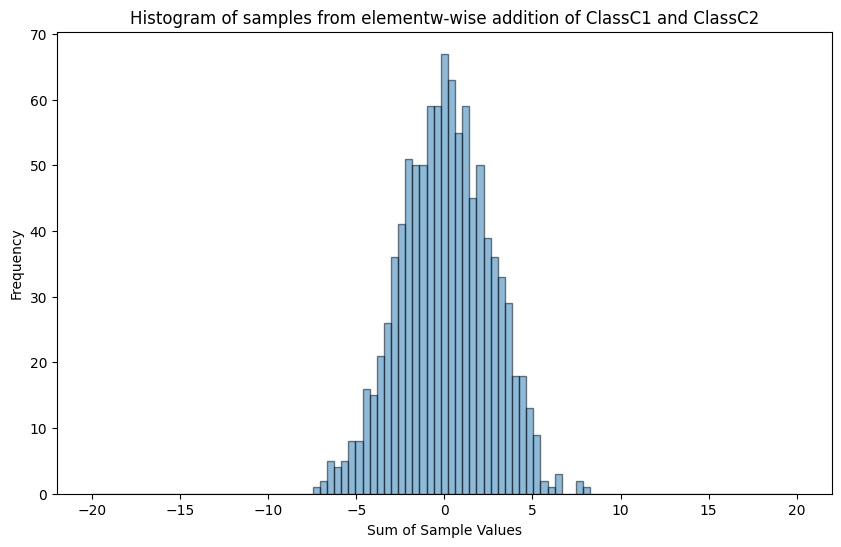

In [3]:
#Q3-2
# Generate points on the x-axis
x = np.linspace(-20, 20, 100)
sum_classC1_C2 = classC1_samples + classC2_samples

# Plot the histogram of the sum of ClassC1 and ClassC2
plt.figure(figsize=(10, 6))
plt.hist(sum_classC1_C2,x, alpha=0.5, edgecolor='black')
plt.title('Histogram of samples from elementw-wise addition of ClassC1 and ClassC2')
plt.xlabel('Sum of Sample Values')
plt.ylabel('Frequency')

# Calculate the sample mean and sample variance of the sum
sample_mean = np.round(np.mean(sum_classC1_C2),3)
sample_variance = np.round(np.var(sum_classC1_C2),3)

print("Sample mean of ClassC1 + ClassC2:", sample_mean)
print("Sample variance of ClassC1 + ClassC2:", sample_variance)

# The distribution of the sum of two independent Gaussian variables
true_mean = -4 + 4  # Sum of the means of ClassC1 and ClassC2
true_variance = 2**2 + 1.5**2  # Sum of the variances of ClassC1 and ClassC2
true_std_dev = np.sqrt(true_variance)

print("True mean of ClassC1 + ClassC2:", true_mean)
print("True standard deviation of ClassC1 + ClassC2 assuming independence:", true_std_dev)

plt.show()


Sample mean of appended ClassC1 and ClassC2: 0.025
Sample variance of appended ClassC1 and ClassC2: 18.836
True mean of appended ClassC1 and ClassC2: 0.0
True variance of appended ClassC1 and ClassC2: 19.125


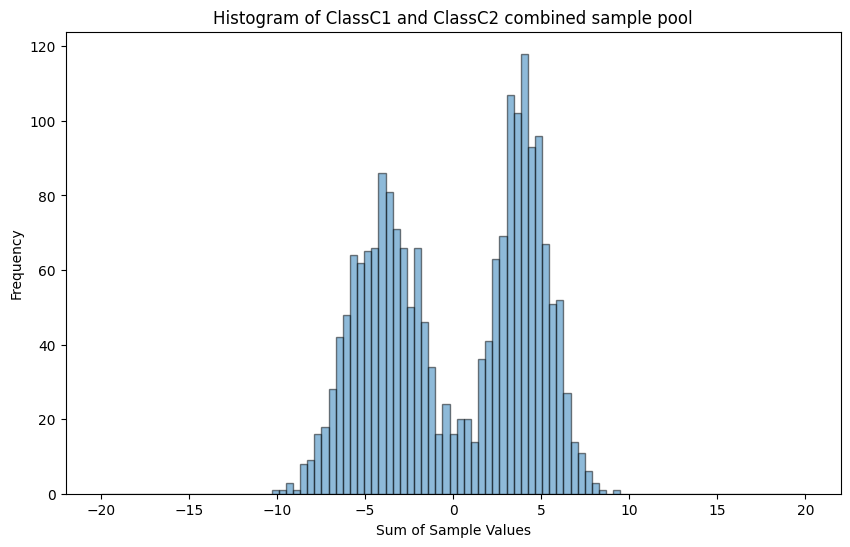

In [4]:
#Q3-3
combined_sample_pool = np.append(classC1_samples, classC2_samples)
appended_mean = np.round(np.mean(combined_sample_pool),3)
appended_variance = np.round(np.var(combined_sample_pool),3)

print("Sample mean of appended ClassC1 and ClassC2:", appended_mean)
print("Sample variance of appended ClassC1 and ClassC2:", appended_variance)

true_mean = (1000*4 + 1000*-4) / 2000
true_variance = 0.5 * (2**2 + (-4 - 0)**2) + 0.5 * (1.5**2 + (4 - 0)**2)


print("True mean of appended ClassC1 and ClassC2:", true_mean)
print("True variance of appended ClassC1 and ClassC2:", true_variance)
plt.figure(figsize=(10, 6))
plt.hist(combined_sample_pool,x, alpha=0.5, edgecolor='black')
plt.title('Histogram of ClassC1 and ClassC2 combined sample pool')
plt.xlabel('Sum of Sample Values')
plt.ylabel('Frequency')
plt.show()

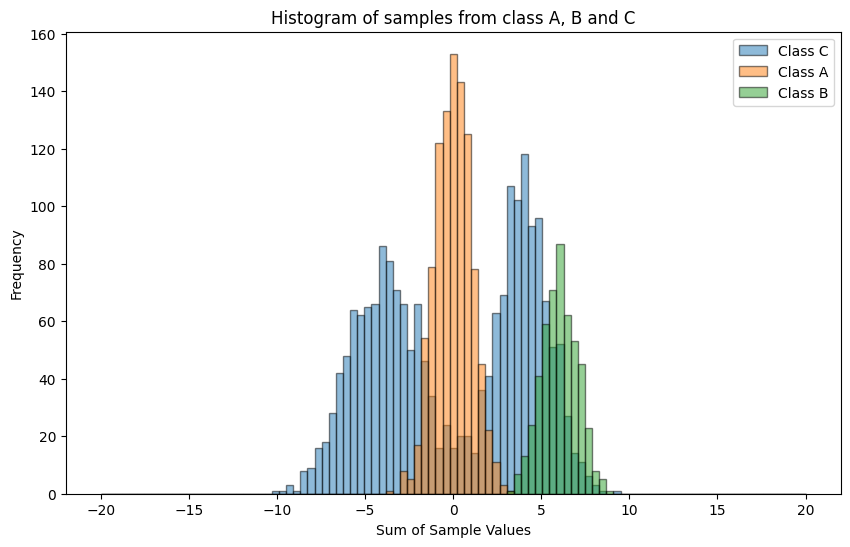

In [5]:
#Q3-4
class_C = np.append(classC1_samples, classC2_samples)

plt.figure(figsize=(10, 6))
plt.hist(class_C,x, alpha=0.5, edgecolor='black',label="Class C")
plt.hist(classA_samples,x,alpha=0.5, edgecolor='black',label="Class A")
plt.hist(classB_samples,x,alpha=0.5, edgecolor='black',label="Class B")
plt.title('Histogram of samples from class A, B and C')
plt.xlabel('Sum of Sample Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [6]:
#Q3-5
# Create labels for each class: 1000 1's for ClassA, 500 2's for ClassB, and 2000 3's for ClassC (ClassC1 + ClassC2)
labelsA = np.ones(1000) * 1  # Class A labels
labelsB = np.ones(500) * 2   # Class B labels
labelsC = np.ones(2000) * 3  # Class C labels (ClassC1 + ClassC2)

# Concatenate the label arrays together to get a Label array
labels = np.concatenate([labelsA, labelsB, labelsC])

# Concatenate the class sample arrays together into a Dataset array
dataset = np.concatenate([classA_samples, classB_samples, class_C])

# Verify the shapes
print("Dataset shape:", dataset.shape)
print("Labels shape:", labels.shape)

# Ensure matching indexing between dataset and labels by maintaining order in concatenation
assert dataset.shape[0] == labels.shape[0], "Mismatch in shapes of Dataset and Labels arrays"


Dataset shape: (3500,)
Labels shape: (3500,)


In [7]:
#Q3-5
random_permutation = np.random.permutation(dataset.shape[0])

# Apply the random permutation to shuffle both the Dataset array and the Label array
shuffled_dataset = dataset[random_permutation]
shuffled_labels = labels[random_permutation]
split_1 = int(0.6 * shuffled_dataset.shape[0])  # 60% for training
split_2 = int(0.8 * shuffled_dataset.shape[0])  # 20% for validation, remaining 20% for testing

# Splitting the dataset
train_set = shuffled_dataset[:split_1]
validation_set = shuffled_dataset[split_1:split_2]
test_set = shuffled_dataset[split_2:]

# Splitting the labels
train_labels = shuffled_labels[:split_1]
validation_labels = shuffled_labels[split_1:split_2]
test_labels = shuffled_labels[split_2:]
print("First 10 elements of the test set:", test_set[:10])
print("Labels of the first 10 test elements:", test_labels[:10])

First 10 elements of the test set: [ 3.77195388 -1.55952527 -2.36207452  7.51323981 -1.96783526  1.00549334
 -0.52502736  4.97558842  7.07914028 -0.25095194]
Labels of the first 10 test elements: [3. 1. 3. 2. 3. 1. 1. 3. 2. 1.]


In [8]:
#Q3-6
from sklearn.mixture import GaussianMixture

# Identify samples and labels corresponding to ClassC in the training set
classC_train_samples = train_set[train_labels == 3]

# Fit a Gaussian Mixture Model (GMM) to ClassC samples in the training set
# Since ClassC is composed of ClassC1 and ClassC2, we'll use 2 components for the GMM
gmm = GaussianMixture(n_components=2, random_state=0)
gmm.fit(classC_train_samples.reshape(-1, 1))  # Reshape for a single feature

# Extract the means, standard deviations, and weights of the Gaussian components
gmm_means = gmm.means_.flatten()
gmm_std_devs = np.sqrt(gmm.covariances_.flatten())  # Square root of the variances
gmm_weights = gmm.weights_.flatten()

print("Gaussian Mixture Model for ClassC (Training Set):")
print("Means:", gmm_means)
print("Standard Deviations:", gmm_std_devs)
print("Weights:", gmm_weights)

Gaussian Mixture Model for ClassC (Training Set):
Means: [-3.97806361  3.97843013]
Standard Deviations: [1.9662312  1.49393333]
Weights: [0.49567319 0.50432681]


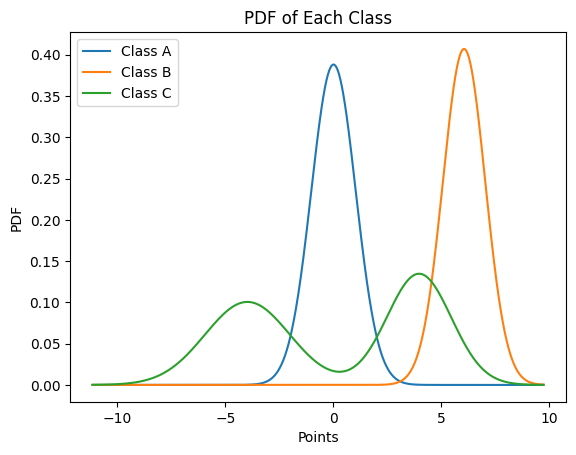

Validation accuracy: 0.8128571428571428


In [9]:
#Q3-7
from scipy.stats import norm
x = np.linspace(-5, 20, 1000)
# Fit Gaussian pdfs to ClassA and ClassB in the training set
classA_train_samples = train_set[train_labels == 1]
classB_train_samples = train_set[train_labels == 2]

# Estimate parameters (mean and standard deviation) for ClassA and ClassB
mean_A, std_A = np.mean(classA_train_samples), np.std(classA_train_samples, ddof=1)
mean_B, std_B = np.mean(classB_train_samples), np.std(classB_train_samples, ddof=1)

# Parameters for ClassC from the GMM (previously estimated)
mean_C1, std_C1 = gmm_means[0], gmm_std_devs[0]
mean_C2, std_C2 = gmm_means[1], gmm_std_devs[1]
likelihood_A = norm.pdf(mean_A, std_A)
likelihood_B = norm.pdf(mean_B, std_B)
# For ClassC, we combine the likelihoods from both components using the weights
likelihood_C = (gmm_weights[0] * norm.pdf(mean_C1, std_C1) +
                gmm_weights[1] * norm.pdf(mean_C2, std_C2))

def maximum_likelihood_classifier(points):
    # Calculate the likelihood of each point for each class
    likelihood_A = norm.pdf(points, mean_A, std_A)
    likelihood_B = norm.pdf(points, mean_B, std_B)
    # For ClassC, we combine the likelihoods from both components using the weights
    likelihood_C = (gmm_weights[0] * norm.pdf(points, mean_C1, std_C1) +
                    gmm_weights[1] * norm.pdf(points, mean_C2, std_C2))

    # Stack the likelihoods for comparison
    likelihoods = np.vstack([likelihood_A, likelihood_B, likelihood_C])
    x_values = np.linspace(min(points)-1, max(points)+1, 1000)  # Adjust the range and granularity as needed
    plt.plot(x_values, norm.pdf(x_values, mean_A, std_A), label='Class A')
    plt.plot(x_values, norm.pdf(x_values, mean_B, std_B), label='Class B')
    plt.plot(x_values, gmm_weights[0] * norm.pdf(x_values, mean_C1, std_C1) + gmm_weights[1] * norm.pdf(x_values, mean_C2, std_C2), label='Class C')
    plt.xlabel('Points')
    plt.ylabel('PDF')
    plt.title('PDF of Each Class')
    plt.legend()
    plt.show()
    # Determine the most likely class for each point
    most_likely_classes = np.argmax(likelihoods, axis=0) + 1  # +1 to match class labels (1, 2, 3)

    return most_likely_classes
# Use the classifier on the validation set
predicted_labels = maximum_likelihood_classifier(validation_set)

# Calculate accuracy
accuracy = np.mean(predicted_labels == validation_labels)
print("Validation accuracy:", accuracy)


In [10]:
#Q3-8
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Initialize the Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Reshape training and validation sets for a single feature
train_set_reshaped = train_set.reshape(-1, 1)
validation_set_reshaped = validation_set.reshape(-1, 1)

# Fit the classifier on the training set
gnb.fit(train_set_reshaped, train_labels)

# Predict labels for the validation set
validation_predictions = gnb.predict(validation_set_reshaped)

# Calculate the validation accuracy
validation_accuracy = accuracy_score(validation_labels, validation_predictions)

print("Validation accuracy using Gaussian Naive Bayes:", validation_accuracy)


Validation accuracy using Gaussian Naive Bayes: 0.8057142857142857


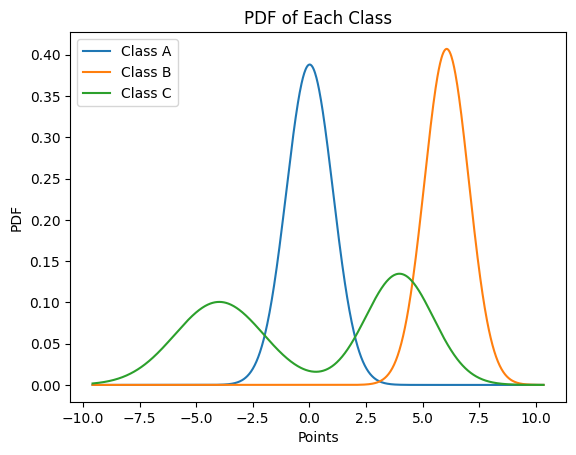

Validation accuracy using Gaussian Naive Bayes on test set: 0.7885714285714286
Validation accuracy using Maximum Likelihood on test set: 0.78
Class-wise accuracy (Gaussian Naive Bayes): [0.75897436 0.78021978 0.80434783]
Class-wise accuracy (Maximum Likelihood): [0.95384615 0.87912088 0.6763285 ]


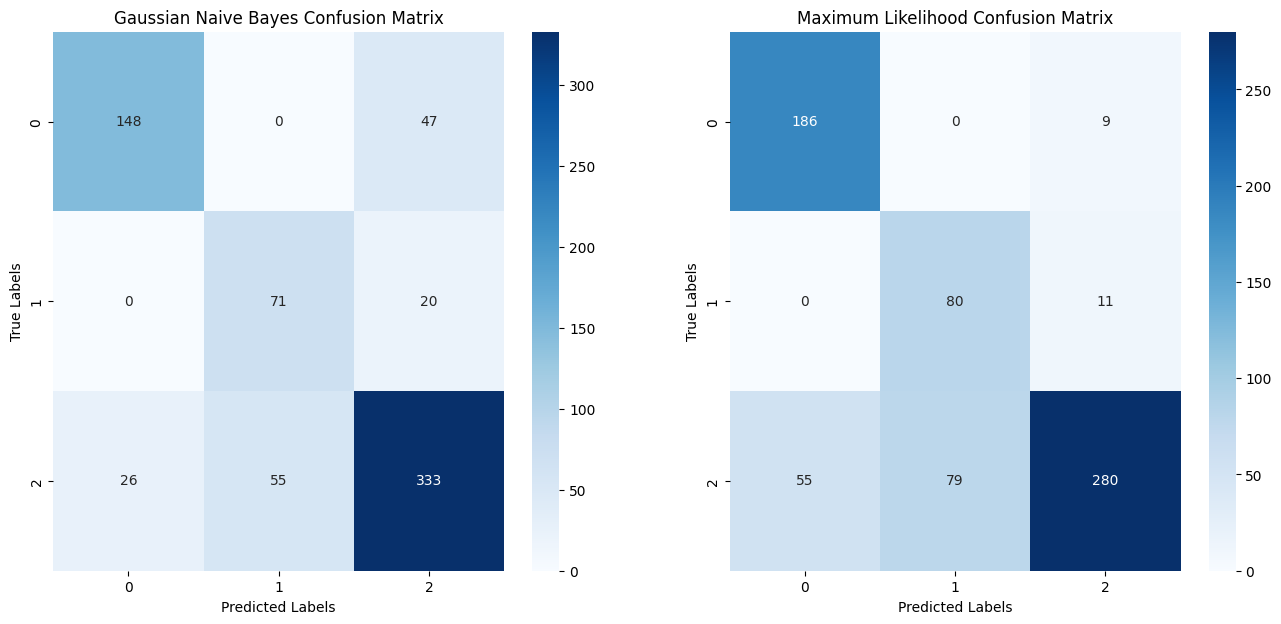

In [12]:
#Q3-9
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Reshape the test set for a single feature
test_set_reshaped = test_set.reshape(-1, 1)
test_predictions_gnb = gnb.predict(test_set_reshaped)
test_predictions_ml = maximum_likelihood_classifier(test_set)

# Confusion matrix for the Gaussian Naive Bayes model
conf_matrix_gnb = confusion_matrix(test_labels, test_predictions_gnb)
conf_matrix_ml = confusion_matrix(test_labels, test_predictions_ml)

gnb_validation_accuracy = accuracy_score(test_labels, test_predictions_gnb)
ml_validation_accuracy = accuracy_score(test_labels, test_predictions_ml)
print("Validation accuracy using Gaussian Naive Bayes on test set:", gnb_validation_accuracy)
print("Validation accuracy using Maximum Likelihood on test set:", ml_validation_accuracy)
# Calculate class-wise accuracy from confusion matrices
class_wise_accuracy_gnb = conf_matrix_gnb.diagonal() / conf_matrix_gnb.sum(axis=1)
class_wise_accuracy_ml = conf_matrix_ml.diagonal() / conf_matrix_ml.sum(axis=1)
print("Class-wise accuracy (Gaussian Naive Bayes):", class_wise_accuracy_gnb)
print("Class-wise accuracy (Maximum Likelihood):", class_wise_accuracy_ml)
# Plotting confusion matrices
fig, ax = plt.subplots(1, 2, figsize=(16, 7))

# Gaussian Naive Bayes Confusion Matrix
sns.heatmap(conf_matrix_gnb, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Gaussian Naive Bayes Confusion Matrix')
ax[0].set_xlabel('Predicted Labels')
ax[0].set_ylabel('True Labels')

# Maximum Likelihood Confusion Matrix
sns.heatmap(conf_matrix_ml, annot=True, fmt='d', cmap='Blues', ax=ax[1])
ax[1].set_title('Maximum Likelihood Confusion Matrix')
ax[1].set_xlabel('Predicted Labels')
ax[1].set_ylabel('True Labels')

plt.show()
